<a href="https://colab.research.google.com/github/Dmtrvna/MML/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание про практике 2

- Провести разведочный анализ EDA (описать полученный результат). Тут важно, влияет ли X[i] на Y (примеры в практике 2)
- Описать полученный результат относительно анализа целевой перменной и зависимой (см. практика 2)
- Подобороться с пропусками в данных (при наличии в датасете). Объяснить способ выборка борьбы с пропуском
- Обучить модель линейной регресии на всей выборке X, y. Вывести метрики
- Сделать train_test_split и обучить на обучающей выборке. Предсказать результат на обучающей и тестовой выборках. Вывести метрики, объяснить полученный результат

## Подготовка данных

In [91]:
!pip install pandas seaborn scikit-learn

In [92]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

In [118]:
df = pd.read_csv("/content/student_depression_dataset.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [119]:
# Удаление лишних столбцов
df = df.drop(columns=['id'])

In [120]:
# Преобразование категориальных признаков в category
categorical = ["Gender", "City", "Profession", "Sleep Duration", "Dietary Habits",
               "Degree", "Have you ever had suicidal thoughts ?", "Financial Stress", "Family History of Mental Illness"]

for col in categorical:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 27901 non-null  category
 1   Age                                    27901 non-null  float64 
 2   City                                   27901 non-null  category
 3   Profession                             27901 non-null  category
 4   Academic Pressure                      27901 non-null  float64 
 5   Work Pressure                          27901 non-null  float64 
 6   CGPA                                   27901 non-null  float64 
 7   Study Satisfaction                     27901 non-null  float64 
 8   Job Satisfaction                       27901 non-null  float64 
 9   Sleep Duration                         27901 non-null  category
 10  Dietary Habits                         27901 non-null  cat

In [121]:
# выбрать целевую переменную и разделить на X, y
# целевая переменная - числовой непрерывный признак

# y - целевая переменная, X - зависимые переменные
y = df.Depression
X = df.drop('Depression', axis=1)

# Проверяем, что Depression не существует
X.head(5)

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No


In [102]:
y.head(5)

,Depression
0,1
1,0
2,0
3,1
4,0


In [122]:
print('Размерность X:', X.shape)
print('Размерность y:', y.shape)

Размерность X: (27901, 16)
Размерность y: (27901,)


## EDA (разведочный анализ относительно целевой переменной)



В этом же блоке побороться с пропусками, важно сделать именно после разведочного анализа
- Y и категориальные
- Y и числовые
- Описать все полученные результаты в своем блоке

- Отобрать признаки для дальнейшего анализа, записать в ```best_features```

In [123]:
cat_cols = ['Gender', 'City', 'Profession', 'Degree', 'Have you ever had suicidal thoughts ?',
                    'Family History of Mental Illness', 'Academic Pressure', 'Work Pressure',
                    'Study Satisfaction', 'Job Satisfaction', 'Dietary Habits', 'Financial Stress', 'Sleep Duration']

num_cols = ['Age', 'CGPA', 'Work/Study Hours']

### Анализ категориальных признаков

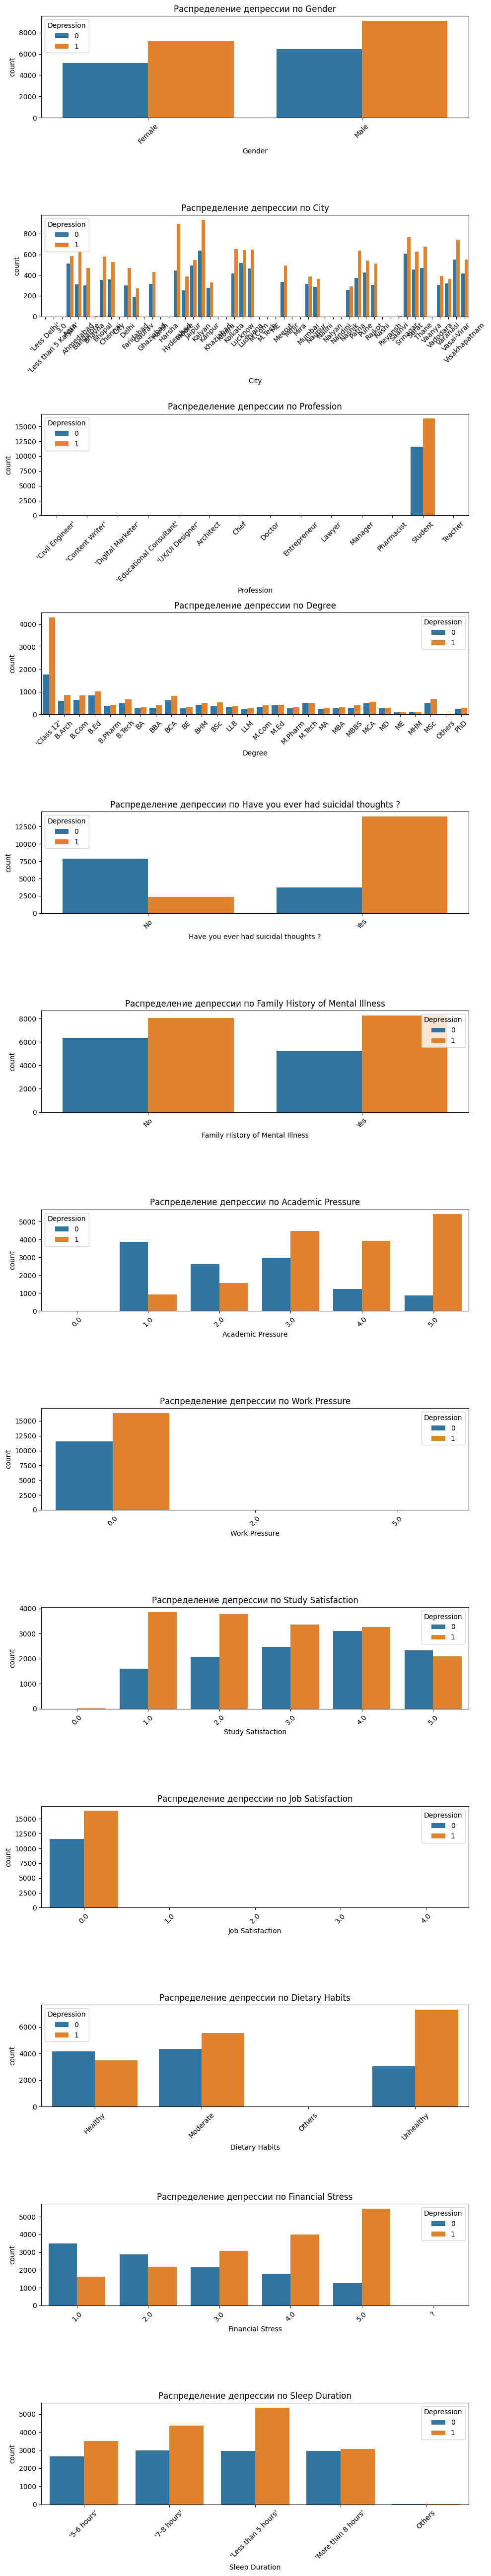

In [75]:
# Pаспределения целевой переменной по категориальным признакам
plt.figure(figsize=(10, len(cat_cols)*4))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 1, i)
    sns.countplot(x=col, hue='Depression', data=df)
    plt.title(f"Распределение депрессии по {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Анализ категориальных признаков относительно целевой переменной Depression показал:

1. Gender. Из графика видно, что среди студентов доля людей с депрессией превышает долю без депрессии в обеих группах. Это говорит о высокой распространенности депрессии как среди мужчин, так и женщин практически в равной мере. Таким образом пол не влияет на депрессию.

2. City. В отдельных городах депрессия встречается значительно чаще, в других городах различия есть, но не очень выраженные. Таким образом город слабо влияет на депрессию.

3. Profession. На графике мы видим явное распределение депрессии только у студентов. По другим категориям распределения практически нет из-за малого числа данных. Предполагается, что данный признак не подходит для дальнейших исследований.

4. Degree. Наиболее выраженное различие по депрессии наблюдается среди студентов младших классов (Class 2-12). На других уровнях образования разницы в долях людей с депрессией и без неё и между уровнями практически нет. Предполагается, что данный признак не подходит для дальнейших исследований.

5. Suicidal thoughts. Студенты с суицидальными мыслями гораздо чаще имеют депрессию по сравнению людьми без таких мыслей. Таким образом суицидальные мысли напрямую влияют на депрессию.

6. Mental Illness. В семьях с историей психических расстройств депрессия встречается чаще. Признак имеет заметную связь с депрессией.

7. Academic Pressure. Высокое учебное давление напрямую влияет на депрессию.

8. Work Pressure. Депрессия немного преобладает над отсутствием депрессии среди студентов, не испытывающих давление на работе. На высоком уровне давления распределения не наблюдается. Предполагается, что данный признак не подходит для дальнейших исследований.

9. Study Satisfaction. При низкой удовлетворённости учебой депрессия встречается чаще, чем при высокой. Таким образом удовлетворённость обучением значительно влияет на депрессию.

10. Job Satisfaction. Среди неудовлетворённых работой депрессия встречается чаще, чем её отсутствие. В других категориях данных мало, поэтому распределение не наблюдается. Предполагается, что данный признак не подходит для дальнейших исследований.

11. Dietary Habits. В группе с нездоровыми привычками питания студентов с депрессией гораздо больше. Значит, нездоровое питание может влиять на депрессию или быть её последствием. Таким образом сон значительно влияет на депрессию. Таким образом питание значительно влияет на депрессию.

12. Financial Stress. Высокий финансовый стресс напрямую влияет на депрессию.

13. Sleep. Видим, что более короткая продолжительность сна показывает более высокую долю депрессии. Таким образом сон значительно влияет на депрессию.

### Анализ числовых признаков

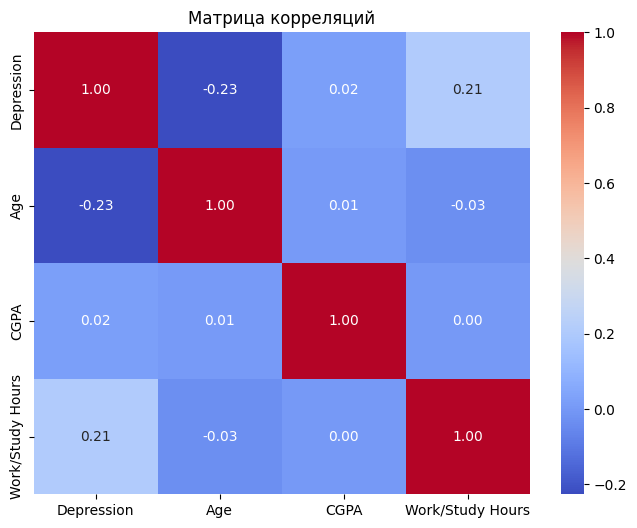

,Depression
Age,-0.226422
CGPA,0.022210
Work/Study Hours,0.208563


In [76]:
X_num = X[num_cols]

# Объединяем y и числовые признаки в один датафрейм для подсчёта корреляций
df_corr = pd.concat([y, X_num], axis=1)
corr_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляций')
plt.show()

# Отобразим корреляции именно между y и числовыми признаками
corr_with_y = corr_matrix['Depression'].drop('Depression')
display(corr_with_y)



Анализ числовых признаков относительно целевой переменной Depression показал:

1. Age. Корреляция -0.226, что свидетельствует о средней отрицательной связи. Это значит, что с увеличением возраста вероятность депрессии может снижаться.

2. CGPA: Корреляция близка к нулю (0.022), практически нет линейной связи с депрессией.

3. Work/Study Hours. Корреляция 0.209, то есть с увеличением количества часов работы/учёбы вероятность депрессии возрастает.

### Отбор признаков

In [144]:
# Отобранные категориальные фичи
categorial_features = ['Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Academic Pressure',
                        'Study Satisfaction', 'Dietary Habits', 'Financial Stress', 'Sleep Duration']

# Отобранные числовые непрерывные фичи
numeric_features = ["Age", "Work/Study Hours"]

best_features = categorial_features + numeric_features

### Проверка пропусков

In [125]:
# Удаляем строки с '?'
df['Financial Stress'] = df['Financial Stress'].astype(str)
df = df[df['Financial Stress'] != '?']

# Преобразуем признак в float после фильтрации
df['Financial Stress'] = df['Financial Stress'].astype(float)

In [128]:
# Заново формируем X и y из очищенного df
y = df['Depression']
X = df.drop('Depression', axis=1)

# Проверка размерности
print('Размерность X:', X.shape)
print('Размерность y:', y.shape)

Размерность X: (27898, 16)
Размерность y: (27898,)


In [129]:
# Проверка пропусков в целевой переменной
y.isnull().sum()

np.int64(0)

In [130]:
# Проверка пропусков во всех признаках
X.isnull().sum()

,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0
Sleep Duration,0


В результате видим, что в нашем датасете нет пропусков.

## Моделирование

**Описание**


**Общая задача:**
Сравнить несколько вариантов линейной регрессии на датасете (с предобработкой признаков: стандартизация числовых, OneHot/Label для категориальных).

**предобработка**
- Категориальные признаки преобразовать с помощью OneHotEncoder (если признак является типом **bool** по логике можно интерпретировать как (true, false) То можно LabelEncoder)
- Числовые признаки записать в `X_scaled` и провести стандартизацию с помощью `StandardScaler`. Желательно без категориальных признаков


---
**Метрики**: (MAE, MAPE, R², MSE, RMSE)

---

**Модель 1.**

- Использовать **все признаки (кроме y)**.
- Обучить на **всей выборке** (без разделения).
- Сделать предсказания на этой же выборке.
- Вывести метрики и интерпретировать.
- Построить график коэффициентов (model.coef\_ vs X\_scaled.columns) и интерпретировать.

---

**Модель 2.**

- Использовать **все признаки**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 3.**

- Использовать только **best\_features** (отобранные признаки).
- Обучить на **всей выборке**.
- Предсказать на всей выборке.
- Вывести метрики качества и интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 4.**

- Использовать **best\_features**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики качества для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

P.S.
- Важно не забывать о стандартизации и разделении категориальных признаков на отдельные колонки
- Все примеры есть в практике 2


P.S.S
Старайтесь делать собственные предположения, ChatGPT задачу решит, но вы не добьетесь понимания полученных результатов

---
В результате должно получиться 4 модели

- первые две на всех колонках (фичах)
- последующие на отобранных фичах (колонках)

### Предобработка

In [131]:
# Категориальные признаки
cat_cols = ["City", "Profession", "Dietary Habits", "Academic Pressure", "Work Pressure",
           "Study Satisfaction", "Job Satisfaction", "Sleep Duration", "Degree", "Financial Stress"]
bin_cols = ['Gender', "Have you ever had suicidal thoughts ?", "Family History of Mental Illness"]

# LabelEncoder для бинарных признаков
for col in bin_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# OneHotEncoder для меток
for col in cat_cols:
    ohe = OneHotEncoder(sparse_output=False, drop='first')
    encoded = pd.DataFrame(ohe.fit_transform(X[[col]]), columns=ohe.get_feature_names_out([col]), index=X.index)
    X = X.drop(col, axis=1)
    X = pd.concat([X, encoded], axis=1)

In [132]:
# Числовые признаки

num_cols = ['Age', 'CGPA', 'Work/Study Hours']

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [133]:
print('Размерность X:', X.shape)
print('Размерность y:', y.shape)

Размерность X: (27898, 124)
Размерность y: (27898,)


OneHotEncoder переводит каждую категориальную переменную в набор бинарных признаков по количеству уникальных категорий.В результате общее число столбцов значительно увеличивается, что влияет на размер итоговой матрицы признаков.

### Моделирование

#### Метрики

1. MAE (Mean Absolute Error, средняя абсолютная ошибка): показывает в среднем, насколько предсказанные значения отличаются от фактических по модулю. Чем меньше MAE, тем точнее прогноз.

2. MAPE (Mean Absolute Percentage Error, средняя абсолютная процентная ошибка): измеряет среднюю ошибку в процентах от фактических значений. Это удобно для оценки точности в относительных величинах.

3. R² (коэффициент детерминации): показывает, какая доля вариации целевой переменной объясняется признаками в модели. Значение 1 - идеальная модель, 0 - модель не лучше случайной.

4. MSE (Mean Squared Error, средняя квадратичная ошибка): похожа на MAE, но ошибка возводится в квадрат, поэтому больше штрафует большие отклонения. Метрика важна для поиска больших промахов в предсказаниях.

5. RMSE (Root Mean Squared Error, корень из MSE): тоже показатель средней ошибки, но измеряется в тех же единицах, что и предсказываемая переменная, поэтому проще для интерпретации. Чем ниже RMSE, тем модель работает точнее.

#### Модель 1

MAE: 0.2652
MAPE: 581209871915655.6250
R²: 0.5224
MSE: 0.1159
RMSE: 0.3405


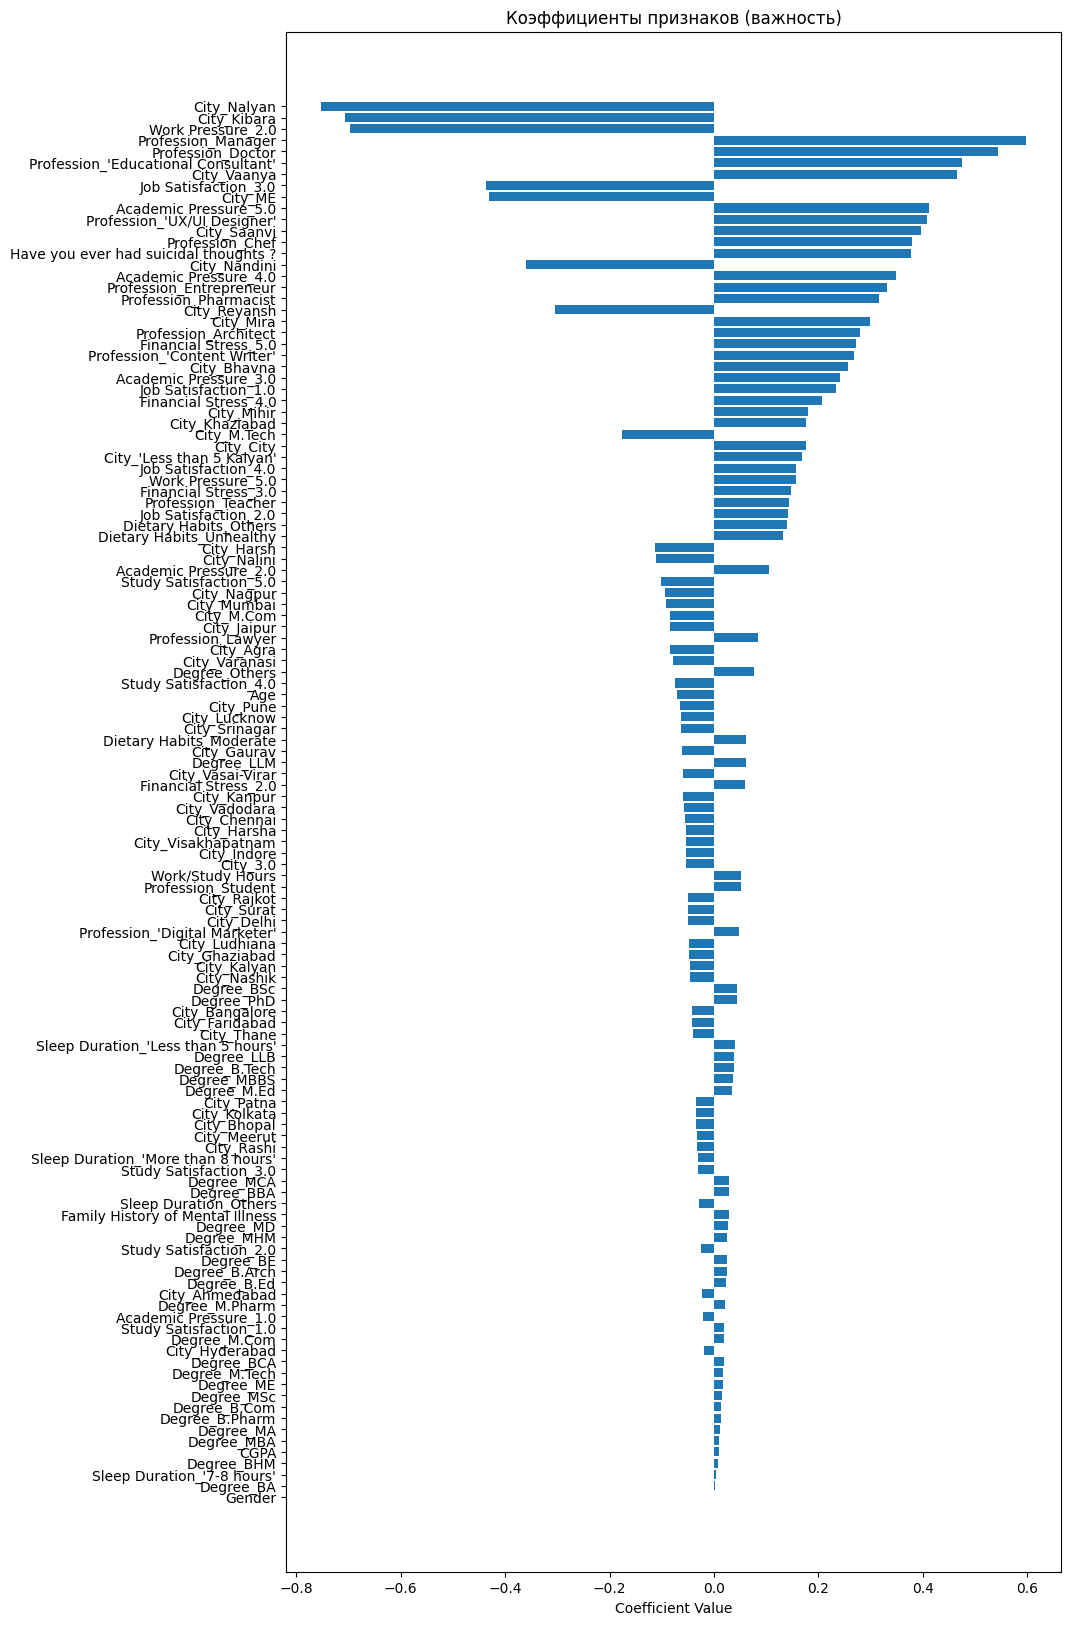

In [138]:
from sklearn.linear_model import LinearRegression

# Обучаем модель
model1 = LinearRegression()
model1.fit(X, y)

# Предсказания
y_pred = model1.predict(X)

# Метрики качества
mae = mean_absolute_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

# График коэффициентов
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model1.coef_})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 20))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Коэффициенты признаков (важность)')
plt.gca().invert_yaxis()
plt.show()


**Интерпретация результатов Модели 1:**

1. Средняя абсолютная ошибка (MAE) - 0,2652. Предсказание отличается от реального значения на 0.27, можно считать, что модель совершила немного ошибок.

2. Средняя абсолютная процентная ошибка (MAPE) - 581209871915655%. Это очень большое отклонение, что говорит о высоком уровне ошибок. Скорее всего, в данных встречаются нули или близкие к нулю значения.

3. Средний уровень качества модели (R²) - 0.5224. Видим средний уровень качества модели, модель объяснила всего 52% вариаций в целевой переменной.

4. Средняя квадратичная ошибка (MSE) - 0,1159. В среднем квадраты отклонений прогноза от настоящих значений составляют 0,12, значит критических ошибок нет.

5. Корень из MSE (RMSE) - 0,3405. Чем ниже RMSE, тем модель работает точнее. Данное значение говорит о средней точности модели.

Модель объясняет чуть больше половины вариантов депрессии и прогнозирует с умеренной точностью. Высокое значение MAPE сигнализирует о неудачной интерпретации или ошибках с нулевыми значениями.

#### Модель 2

Train metrics:
MAE: 0.2649
MAPE: 577975082082610.0000
R²: 0.5216
MSE: 0.1161
RMSE: 0.3407

Test metrics:
MAE: 0.2653
MAPE: 596635035857383.6250
R²: 0.5212
MSE: 0.1163
RMSE: 0.3411


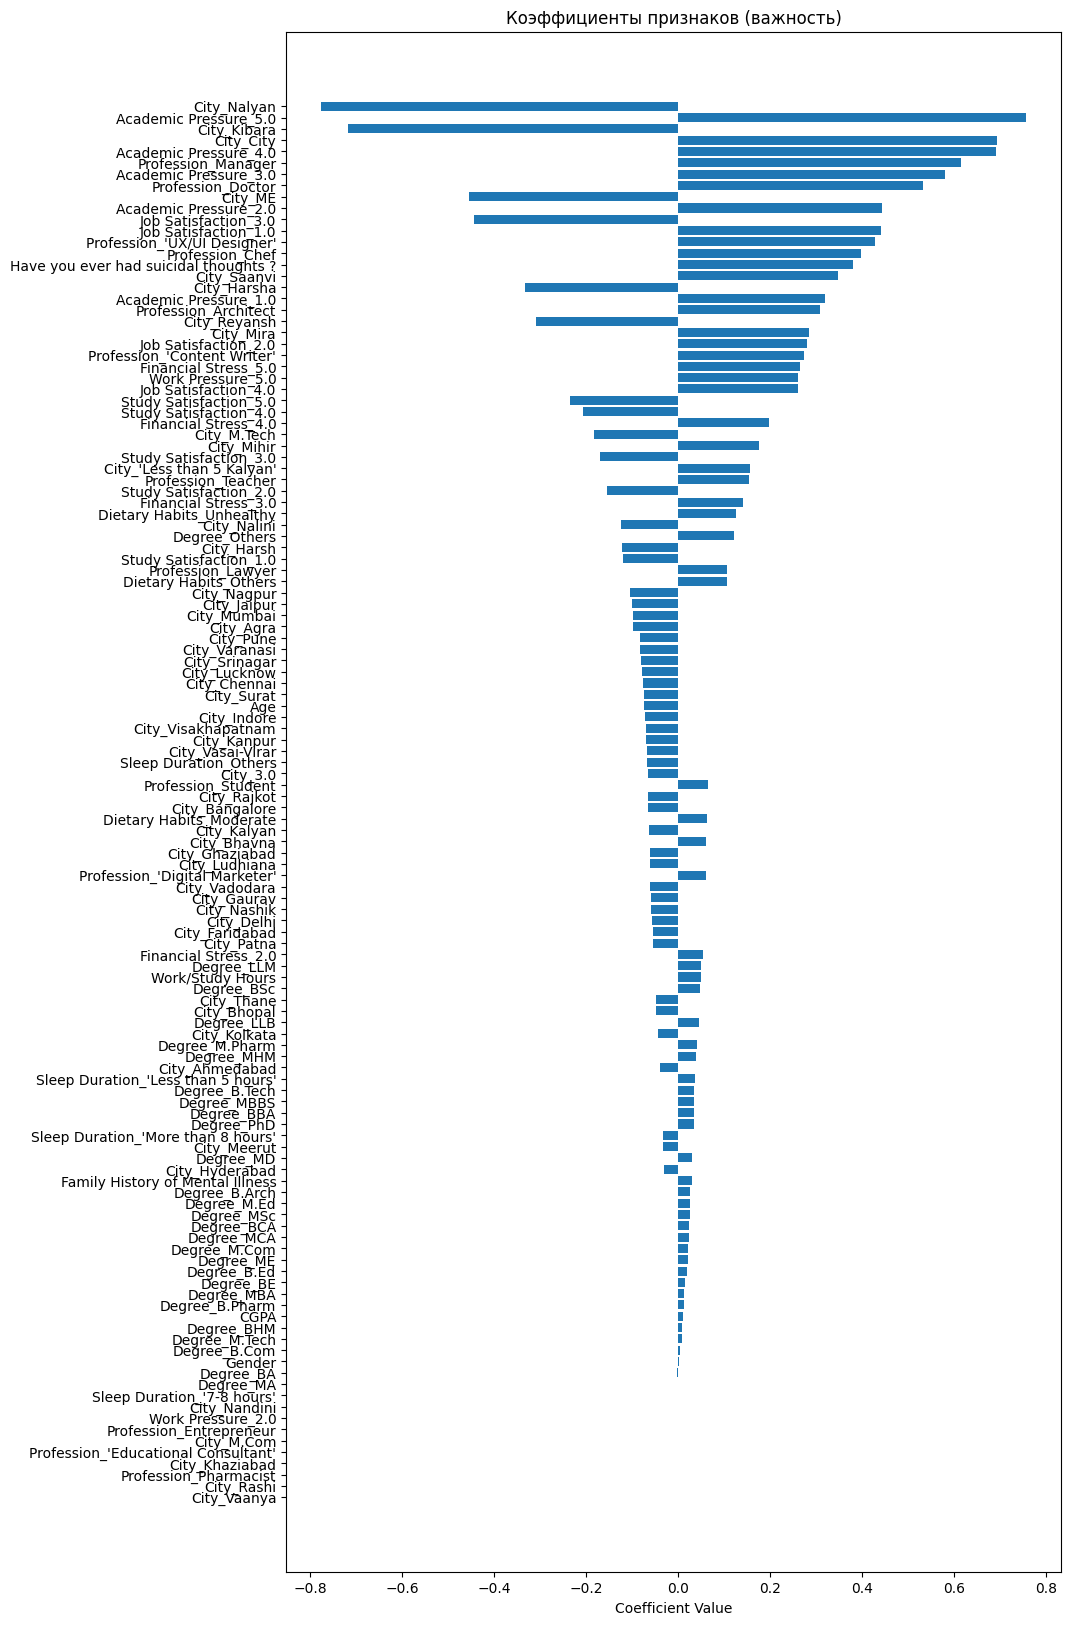

In [141]:
# Разделяем данные: 70% — обучение, 30% — тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели на training
model2 = LinearRegression()
model2.fit(X_train, y_train)

# Предсказания
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

# Метрики для обучающей выборки
print("Train metrics:")
mae = mean_absolute_error(y_train, y_train_pred)
mape = mean_absolute_percentage_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

# Метрики для тестовой выборки
print("\nTest metrics:")
mae = mean_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

# График коэффициентов
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model2.coef_})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 20))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Коэффициенты признаков (важность)')
plt.gca().invert_yaxis()
plt.show()

**Интерпретация результатов Модели 2:**

Train metrics:

1. Средняя абсолютная ошибка (MAE) — 0,2649. В среднем предсказания отличаются от настоящих значений на 0,26, что указывает на низкий уровень ошибок на обучающей выборке.

2. Средняя абсолютная процентная ошибка (MAPE) — 577975082082610. Это очень большое отклонение, что говорит о высоком уровне ошибок. Скорее всего, в данных встречаются нули или близкие к нулю значения.

3. Коэффициент детерминации (R²) — 0,5216. Только 52% вариации целевой переменной объясняются признаками, заложенными в модель, это говорит о средней точности предсказаний модели.

4. Средняя квадратичная ошибка (MSE) — 0,1161. Квадраты отклонений в среднем составляют 0,12, значит больших промахов немного.

5. Корень из средней квадратичной ошибки (RMSE) — 0,3407. Данные говорят о средней точности модели.

Test metrics:

1. MAE — 0,2653. В среднем ошибка прогноза равна 0,27, что похоже на результат тренировки, значит переобучения не было.

2. MAPE — 596635035857383.62. Отклонение стало ещё больше, значит было много ошибок.

3. R² — 0,5212. Качество на тесте такое же, как на тренировке (52%), что говорит о средней точности предсказаний модели.

4. MSE — 0,1163. Среднее отклонение в квадрате — 0,12, значит больших промахов немного.

5. RMSE — 0,3411. Ошибка на тесте практически не отличается от тренировки. Данные говорят о средней точности модели.

#### Модель 3

In [145]:
# Выделяем данные по признакам
X_cat = df[categorial_features].astype('category')
X_num = df[numeric_features]

# OneHot кодирование категориальных признаков
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_cat_encoded = encoder.fit_transform(X_cat)
cat_feature_names = encoder.get_feature_names_out(categorial_features)

# Масштабирование числовых признаков
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# Объединение обработанных признаков
X_scaled = pd.DataFrame(
    np.hstack([X_num_scaled, X_cat_encoded]),
    columns=list(numeric_features) + list(cat_feature_names),
    index=df.index
)

MAE: 0.2661
MAPE: 583669694902460.0000
R²: 0.5190
MSE: 0.1167
RMSE: 0.3417


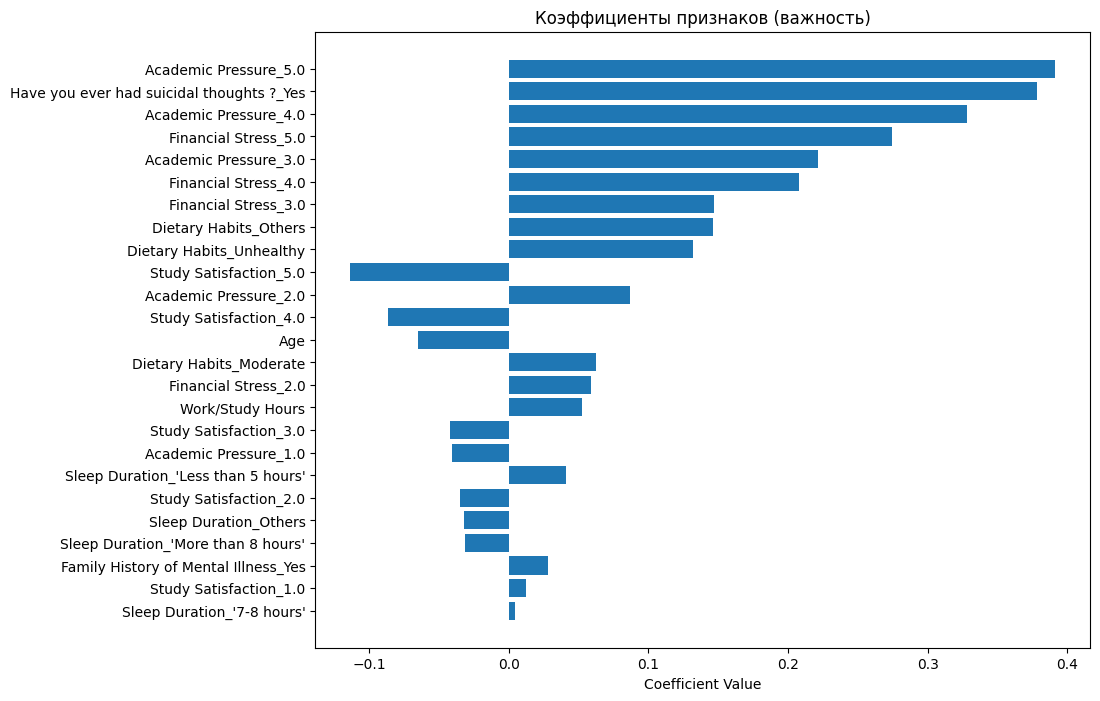

In [148]:
# Обучаем модель
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()
model3.fit(X_scaled, y)

# Предсказания
y_pred = model3.predict(X_scaled)

# Метрики качества
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error
mae = mean_absolute_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

# График коэффициентов
coef_df = pd.DataFrame({'Feature': X_scaled.columns, 'Coefficient': model3.coef_})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Коэффициенты признаков (важность)')
plt.gca().invert_yaxis()
plt.show()

**Интерпретация результатов Модели 3:**

1. Средняя абсолютная ошибка (MAE) — 0.2661. Предсказания отличаются от реальных значений на 0.27, что говорит о небольшом среднем уровне ошибок.

2. Средняя абсолютная процентная ошибка (MAPE) — 583669694902460%. Это очень большое отклонение, что говорит о высоком уровне ошибок. Скорее всего, в данных встречаются нули или близкие к нулю значения.

3. Коэффициент детерминации (R²) — 0.5190. Модель объясняет 52% вариаций, что указывает на среднюю точность предсказаний модели.

4. Средняя квадратичная ошибка (MSE) — 0.1167. В среднем квадраты разниц между прогнозом и настоящими значениями равны 0.12, значит крупных ошибок немного.

5. Корень из средней квадратичной ошибки (RMSE) — 0.3417. Это указывает на среднюю точность предсказаний модели.

Модель объясняет чуть больше половины случаев депрессии, средние ошибки и метрики практически не изменились после отбора признаков, а большое MAPE же говорит о проблемах с исходными данными.

#### Модель 4

Train metrics:
MAE: 0.2653
MAPE: 580215496800865.6250
R²: 0.5194
MSE: 0.1165
RMSE: 0.3413

Test metrics:
MAE: 0.2672
MAPE: 615180868421826.3750
R²: 0.5164
MSE: 0.1179
RMSE: 0.3433


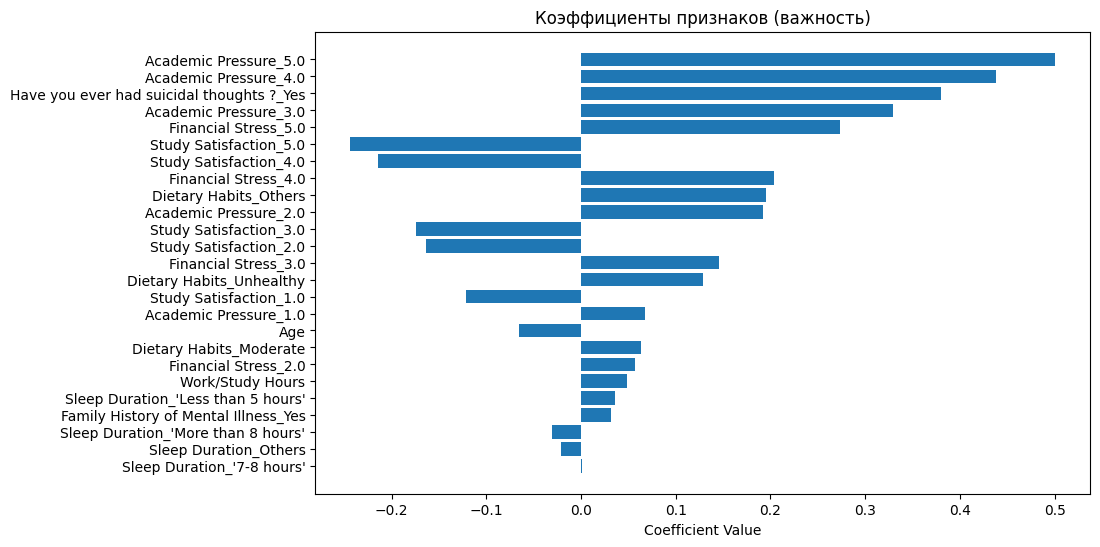

In [152]:
# Делим на train и test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Обучаем модель на обучающей выборке
model4 = LinearRegression()
model4.fit(X_train, y_train)

# Предсказания
y_train_pred = model4.predict(X_train)
y_test_pred = model4.predict(X_test)

# Метрики для обучающей выборки
print("Train metrics:")
mae = mean_absolute_error(y_train, y_train_pred)
mape = mean_absolute_percentage_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

# Метрики для тестовой выборки
print("\nTest metrics:")
mae = mean_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

# График коэффициентов
coef_df = pd.DataFrame({'Feature': X_scaled.columns, 'Coefficient': model4.coef_})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Коэффициенты признаков (важность)')
plt.gca().invert_yaxis()
plt.show()

**Интерпретация результатов Модели 4:**

Train metrics:

1. Средняя абсолютная ошибка (MAE) — 0,2653. В среднем предсказания отличаются от настоящих значений на 0,27, что указывает на невысокий уровень ошибок модели при обучении и отсутвие.

2. Средняя абсолютная процентная ошибка (MAPE) — 580215496800865. Очень большое отклонение, означает наличие нулевых или близких к нулю значений.

3. Коэффициент детерминации (R²) — 0,5194. Около 52% вариаций в целевой переменной объяснены моделью, что указывает на среднюю точность предсказаний модели.

4. Средняя квадратичная ошибка (MSE) — 0,1165. В среднем квадраты отклонений прогноза от фактических значений равны 0,12, больших ошибок немного.

5. Корень из квадратичной ошибки (RMSE) — 0,3413. Это указывает на среднюю точность предсказаний модели.

Test metrics:

1. MAE — 0,2672. Ошибка прогноза на тесте близка к тренировочной, что говорит об отсутствии переобучения.

2. MAPE — 615180868421826.38. Значение MAPE ещё выше, метрика не подходит для анализа ошибки на этих данных.

3. R² — 0,5164. Качество на тесте почти такое же, как при обучении. Около 52% вариаций в целевой переменной объяснены моделью, что указывает на среднюю точность предсказаний модели.

4. MSE — 0,1179. Квадратичная ошибка осталась практически такой же, значит крупных ошибок нет.

5. RMSE — 0,3433. Ошибка на тесте почти не изменилась, модель прогнозирует со средней точностью.

## Подсказки

Ниже представлены подсказки, то что нужно использовать и как должно называться

### Преобразование категориальных

In [ ]:
# https://habr.com/ru/articles/456294/ - виды Encoder для категориальных признаков
# LabelEncoder, OneHotEncoder
# Label для bool (0,1), (yes, no), (true, false)
# OneHot - для меток

from sklearn.preprocessing import OneHotEncoder # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

encoder = OneHotEncoder(sparse_output=False)  # sparse=False → выдаёт DataFrame, а не numpy матрицу
encoded = encoder.fit_transform(X[["YOU_VARIABLE_NAME"]])  # .fit_transfom(X) - обучить и трансформировать, т.е. вернуть результат

In [ ]:
X_encoded = ...

In [ ]:
X = X.drop('YOU_VARIABLE_NAME', axis=1) if 'type' in X.columns else X # убираем базовую колонку type = [red, white]
X = pd.concat([X, X_encoded], axis=1) if 'type_white' not in X.columns else X # оставляем 2 разные колонки [type_red, type_white]

### Преобразование числовых

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # попробовать избавиться от категориальных. То ест не засовывать такие признаки в стандартизацию


### Модель

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# model.fit(X, y) - обучение
# model.predict(X) - предсказание y
# model.coef_ - коэфициенты фич (каждый коэф относится по индексу к своей фиче)

# для того, чтобы не запутаться используйте следующий нейминг
model1 = LinearRegression() # модель задачи 1
model2 = LinearRegression() # модель задачи 2
... # и так далее

### Разделение на обучающую, тестовую

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # Рездляем данные как 80% - обучение, 20% на тест